In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Load the data with correct encoding and column name
file_path = r"C:\Users\Prakruthi Reddy\Downloads\Sales_Forecasting_for_retail.csv"
df = pd.read_csv(file_path, encoding='latin1', parse_dates=['Order Date'])
df.set_index('Order Date', inplace=True)

# Optional: Sort index in case it's unordered
df.sort_index(inplace=True)

In [3]:
# Aggregate to daily sales (if needed)
daily_sales = df['Sales'].resample('D').sum()

In [4]:
# ADF test
result = adfuller(daily_sales.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.9398788035312915
p-value: 2.9148790727676675e-05


In [5]:
# Difference if not stationary
if result[1] > 0.05:
    daily_sales = daily_sales.diff().dropna()

In [6]:
# Fit ARIMA model (adjust (p,d,q) if needed)
model = ARIMA(daily_sales, order=(1, 1, 1))
model_fit = model.fit()

In [7]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Set future dates as index
last_date = daily_sales.index[-1]
forecast_df = pd.DataFrame({'Forecasted Sales': forecast})
forecast_df.index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

In [8]:
# Save forecast to CSV
output_path = r"C:\Users\Prakruthi Reddy\Downloads\Daily_Sales_Forecast_Output.csv"
forecast_df.to_csv(output_path)
print(f"Forecast saved to: {output_path}")

Forecast saved to: C:\Users\Prakruthi Reddy\Downloads\Daily_Sales_Forecast_Output.csv


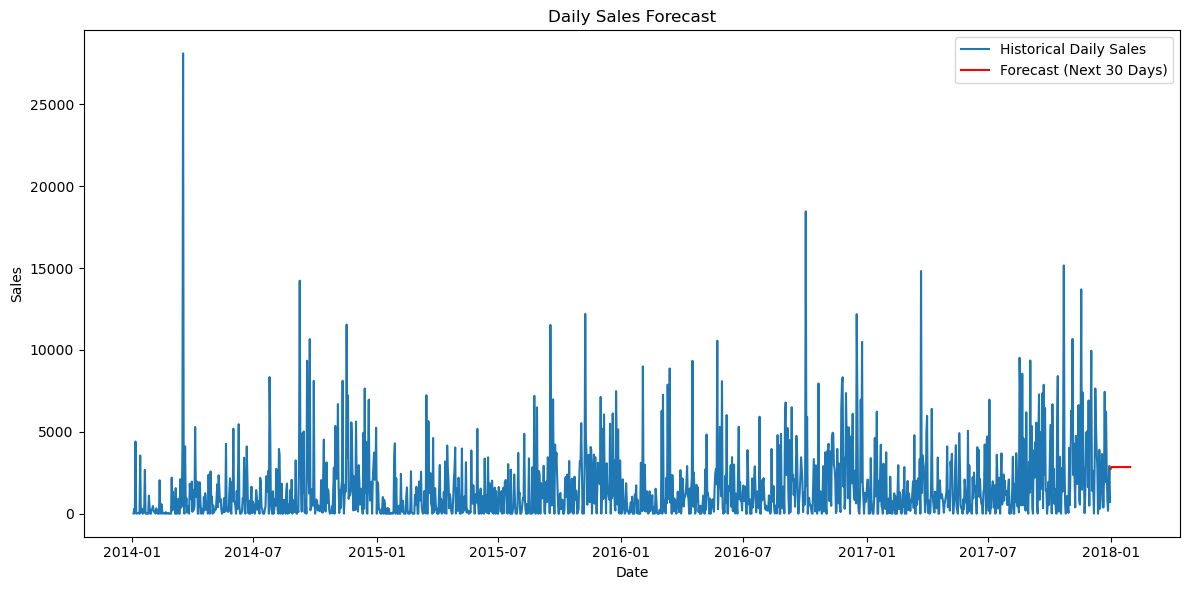

In [9]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Historical Daily Sales')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], color='red', label='Forecast (Next 30 Days)')
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()